In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_name = "https://raw.githubusercontent.com/itsahmedmohamedamin/Predicting-Insurance-Premiums/main/insurance.csv"
insurance = pd.read_csv(file_name)
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [44]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [45]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [46]:
print("Rows: ", insurance.shape[0])
print("Columns: ", insurance.shape[1])
print("\nFeatures: \n", insurance.columns.tolist())
print("\nMissing values: ", insurance.isnull().values.sum())
print("\nUnique values: \n", insurance.nunique())

Rows:  1338
Columns:  7

Features: 
 ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

Missing values:  0

Unique values: 
 age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


In [47]:
numerical_insurance = insurance.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_insurance.corr()
correlation_matrix

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


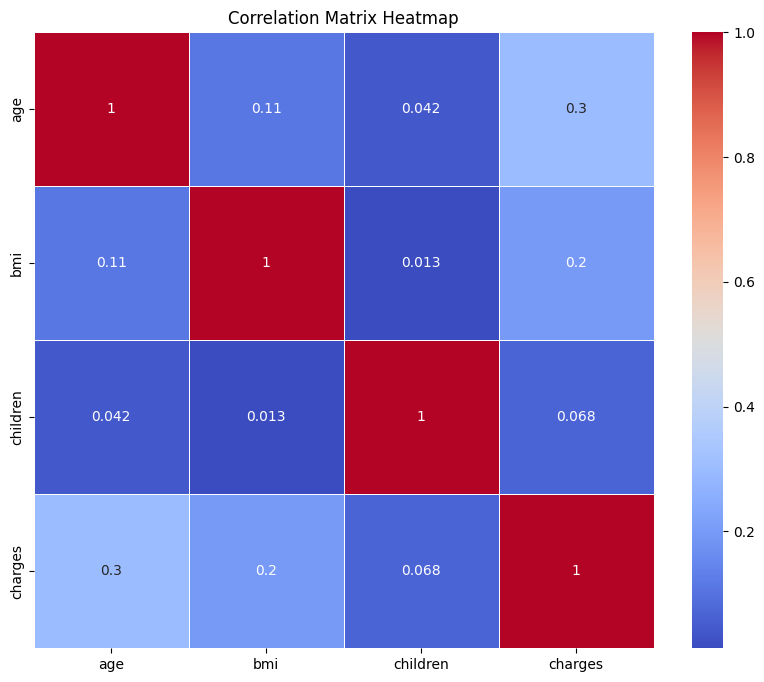

In [48]:
# Correlation Heatmap for Numerical Features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

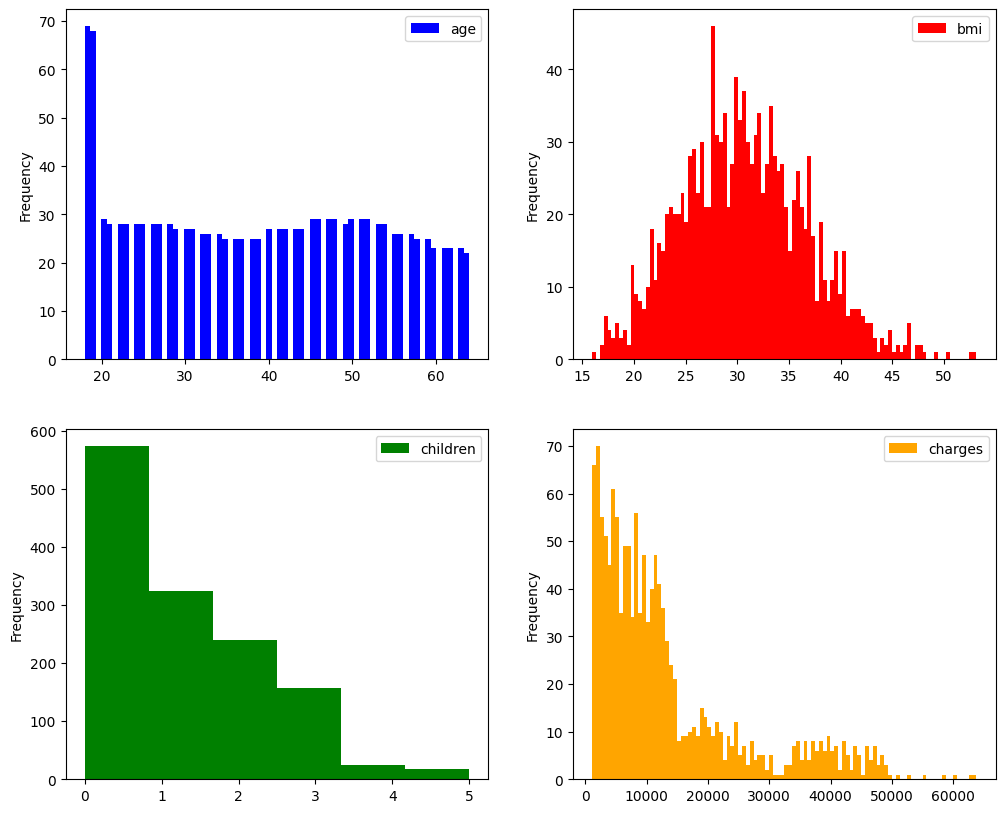

In [49]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(12,10))
numerical_insurance.plot(kind="hist",y="age",bins=70,color="blue",ax=axes[0][0])
numerical_insurance.plot(kind="hist",y="bmi",bins=100,color="red",ax=axes[0][1])
numerical_insurance.plot(kind="hist",y="children",bins=6,color="green",ax=axes[1][0])
numerical_insurance.plot(kind="hist",y="charges",bins=100,color="orange",ax=axes[1][1])
plt.show()

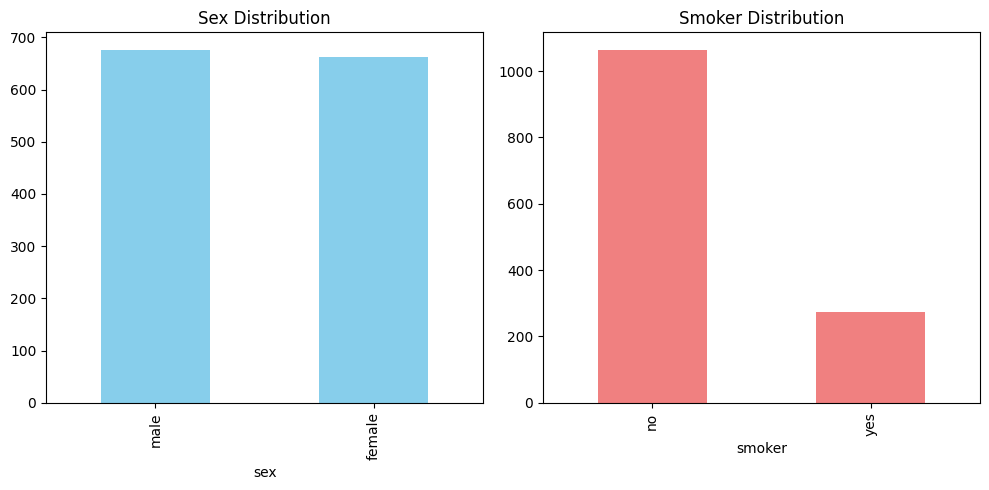

In [50]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
insurance['sex'].value_counts().plot(kind='bar', color='skyblue', title='Sex Distribution')
plt.subplot(1, 2, 2)
insurance['smoker'].value_counts().plot(kind='bar', color='lightcoral', title='Smoker Distribution')
plt.tight_layout()
plt.show()

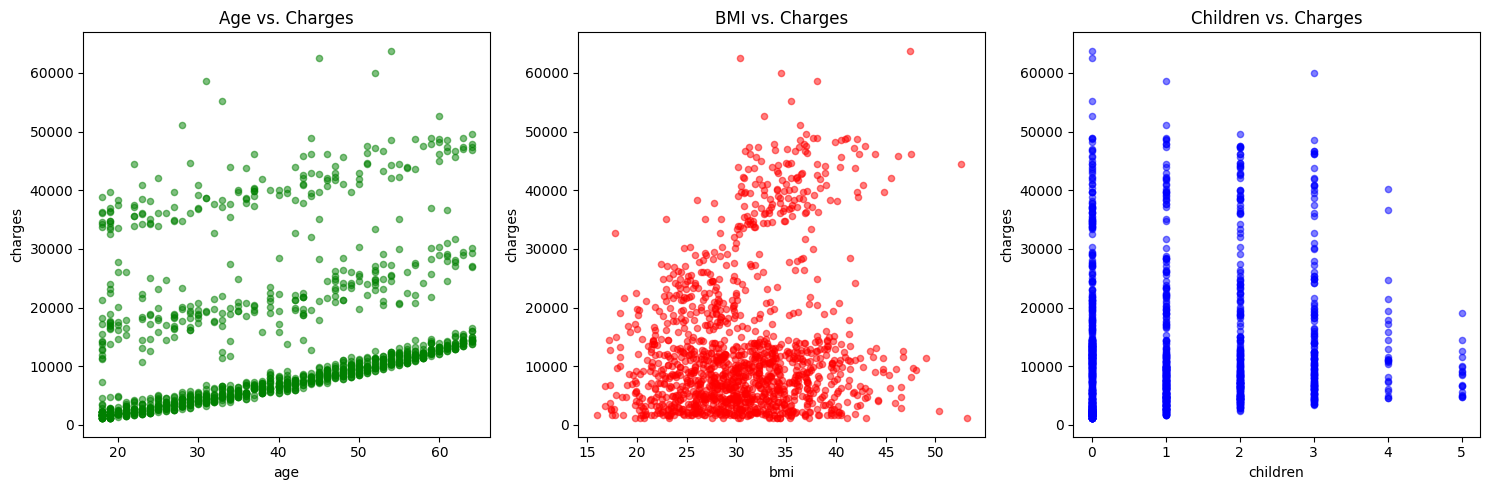

In [51]:
# Scatter plots for numerical features vs charges
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
insurance.plot(kind='scatter', x='age', y='charges', alpha=0.5, color='green', ax=axes[0], title='Age vs. Charges')
insurance.plot(kind='scatter', x='bmi', y='charges', alpha=0.5, color='red', ax=axes[1], title='BMI vs. Charges')
insurance.plot(kind='scatter', x='children', y='charges', alpha=0.5, color='blue', ax=axes[2], title='Children vs. Charges')
plt.tight_layout()
plt.show()


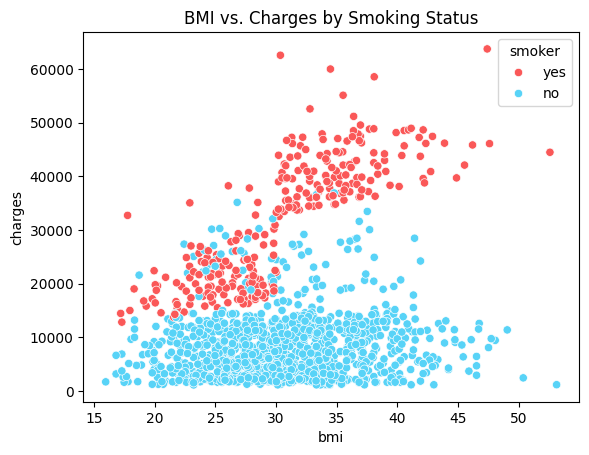

In [52]:
# Scatter plot with hue for smokers
pal = ["#FA5858", "#58D3F7"]
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=insurance, palette=pal)
plt.title('BMI vs. Charges by Smoking Status')
plt.show()

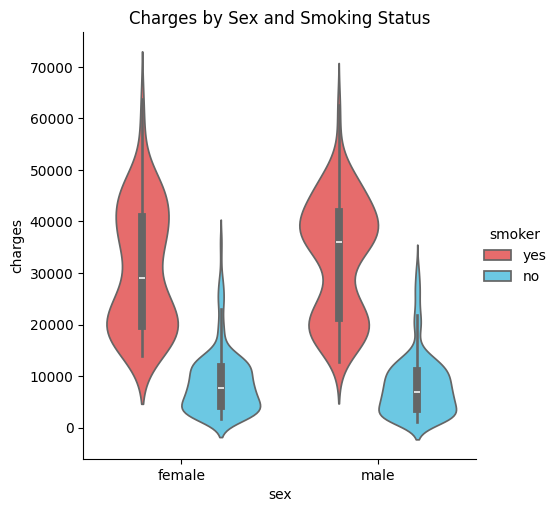

In [53]:
# Violin plot for charges by sex and smoking status
sns.catplot(x='sex', y='charges', hue='smoker', data=insurance, palette=pal, kind='violin')
plt.title('Charges by Sex and Smoking Status')
plt.show()

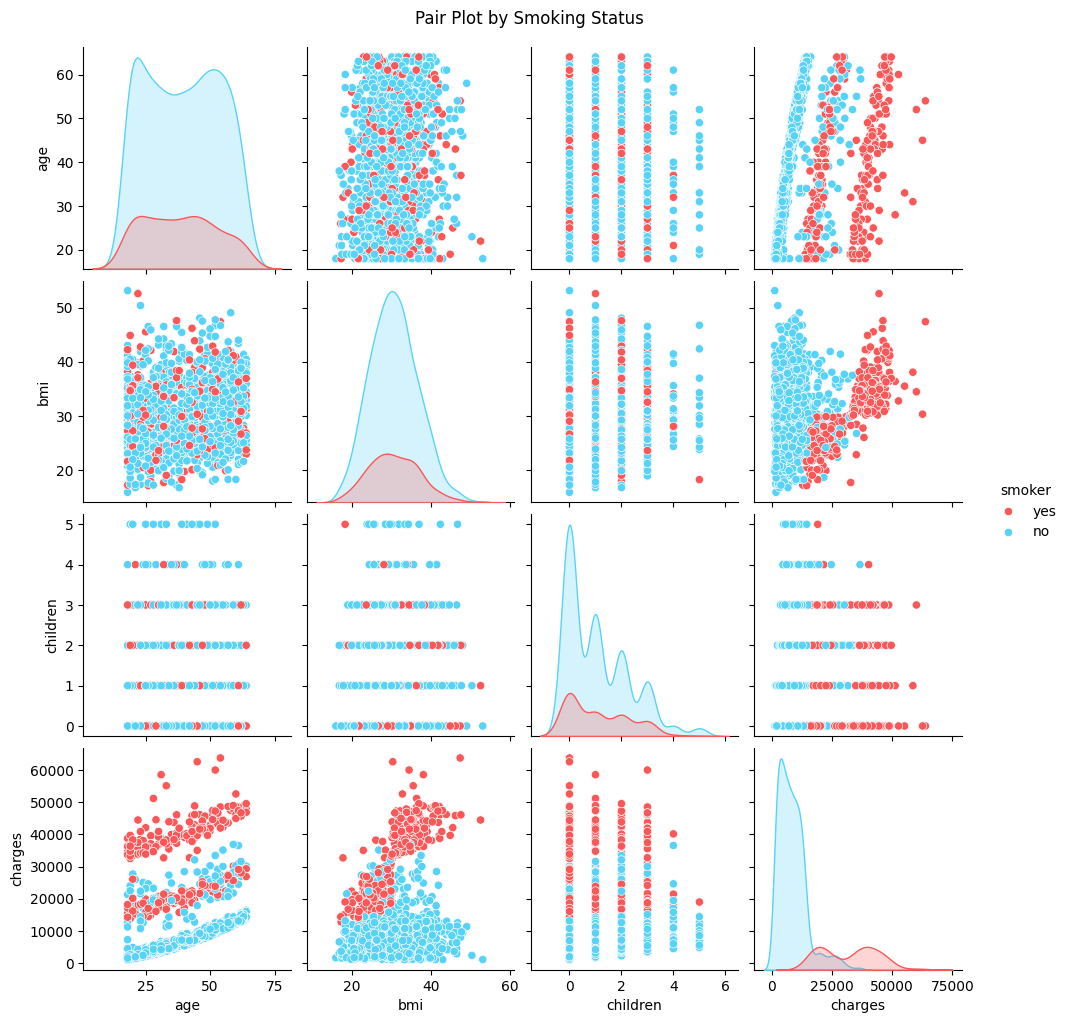

In [54]:
sns.pairplot(insurance, hue='smoker', palette=pal)
plt.suptitle("Pair Plot by Smoking Status", y=1.02)
plt.show()

<ipython-input-55-2797bce83e32>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='charges', data=insurance, palette='Set2')


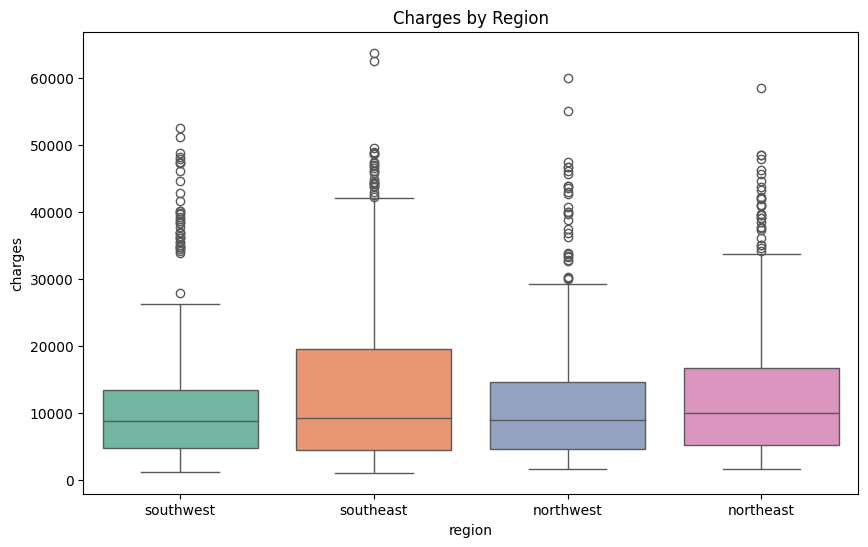

In [55]:
# Box plot for charges by region
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='charges', data=insurance, palette='Set2')
plt.title('Charges by Region')
plt.show()

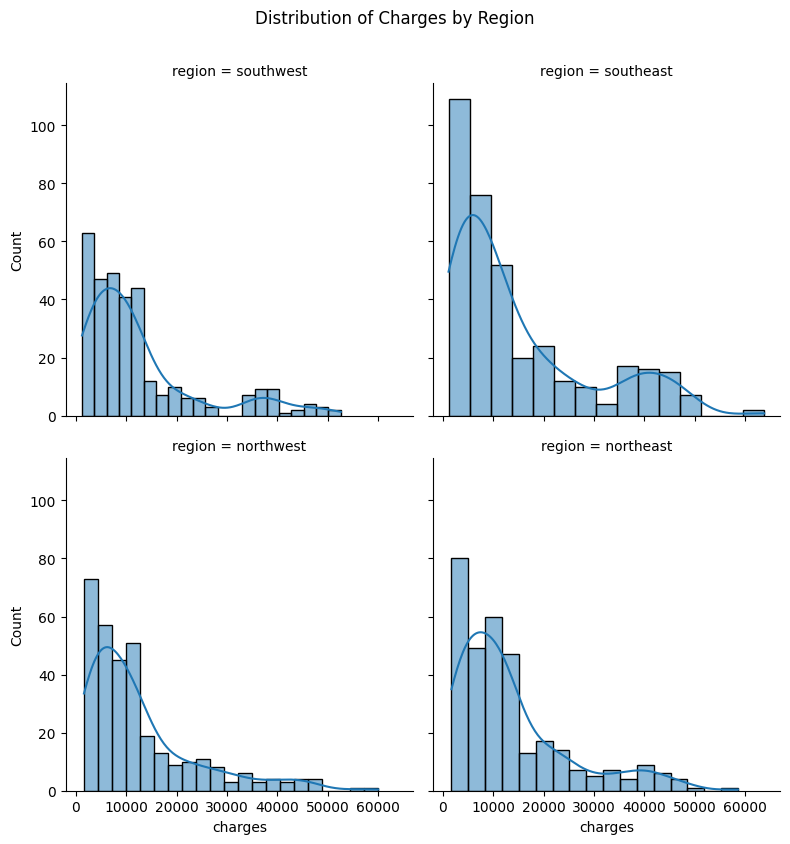

In [56]:
# Distribution of charges by region
g = sns.FacetGrid(insurance, col='region', col_wrap=2, height=4)
g.map(sns.histplot, 'charges', kde=True)
g.fig.suptitle('Distribution of Charges by Region', y=1.05)
plt.show()

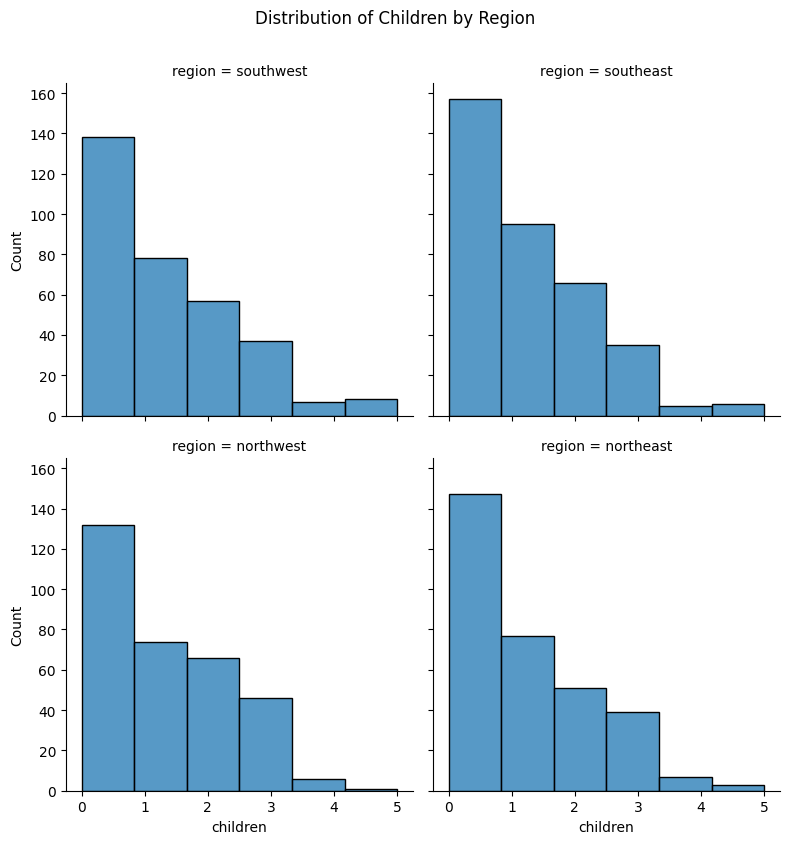

In [57]:
# Plot distribution of children by region
g = sns.FacetGrid(insurance, col='region', col_wrap=2, height=4)
g.map(sns.histplot, 'children', kde=False, bins=6)
g.fig.suptitle('Distribution of Children by Region', y=1.05)
plt.show()

In [58]:
# Preparing Data for ML Algorithm

In [59]:
# Random Forest Regressor

In [60]:
# Importing Libraries

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [62]:
# Pre process the data

In [63]:
insurance_encoded = pd.get_dummies(insurance, drop_first=True)

In [64]:
# Feature Engineering

In [65]:
# Create interaction features
insurance_encoded['age_bmi'] = insurance_encoded['age'] * insurance_encoded['bmi']
insurance_encoded['age_smoker'] = insurance_encoded['age'] * insurance_encoded['smoker_yes']
insurance_encoded['bmi_smoker'] = insurance_encoded['bmi'] * insurance_encoded['smoker_yes']

# Log transform skewed features
insurance_encoded['log_charges'] = np.log1p(insurance_encoded['charges'])
insurance_encoded['log_bmi'] = np.log1p(insurance_encoded['bmi'])

# Define features and target variable
X = insurance_encoded.drop(['charges', 'log_charges'], axis=1)
y = insurance_encoded['log_charges']

# Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

In [66]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [67]:
# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [68]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Inverse log transform to get the actual charges
y_test_actual = np.expm1(y_test)
y_pred_actual = np.expm1(y_pred)

In [69]:
# Evaluate the model
mae = mean_absolute_error(y_test_actual, y_pred_actual)
mse = mean_squared_error(y_test_actual, y_pred_actual)
rmse = mean_squared_error(y_test_actual, y_pred_actual, squared=False)
r2 = r2_score(y_test_actual, y_pred_actual)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

# Create a comparison dataframe
comparison_df = pd.DataFrame({'Actual': y_test_actual, 'Predicted': y_pred_actual})
print(comparison_df.head())


Mean Absolute Error: 2011.9437012559679
Mean Squared Error: 18468051.718654048
Root Mean Squared Error: 4297.447116446467
R^2 Score: 0.8810421731553236
           Actual     Predicted
764    9095.06825   8572.949583
887    5272.17580   5054.249726
890   29330.98315  28216.424857
1293   9301.89355  11524.950289
259   33750.29180  34722.647022
